In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [219]:
df = pd.read_csv('the_dataset_I_just_made.csv', index_col='Unnamed: 0')
indexes = df.index.value_counts() == 1
print(indexes)
indexes = indexes.index[indexes]
df = df.loc[df.index.isin(indexes)]
print(df['label'].value_counts())

df['label']=df['label'].astype(int)
y = df.iloc[:,0]
df = df.iloc[:, 1:]


#y["label"] = y["label"].astype(int)
display(y)
df


POLE     False
BRAF     False
AKT1     False
EGFR     False
TUBB3    False
         ...  
GAS7      True
FYN       True
FUS       True
FSTL3     True
ZNRF3     True
Length: 401, dtype: bool
4.0    164
1.0     28
2.0     27
6.0     24
7.0     10
8.0      7
0.0      6
5.0      6
3.0      3
Name: label, dtype: int64


ABI1      4
ABL2      4
ACVR2A    8
AFF1      4
AFF3      4
         ..
YES1      4
ZBTB16    4
ZNF384    4
ZNF521    4
ZNRF3     2
Name: label, Length: 275, dtype: int32

,dep_0,dep_1,dep_2,dep_3,dep_4,dep_5,dep_6,dep_7,eff_0,eff_1,...,eff_6,eff_7,exp_0,exp_1,exp_2,exp_3,exp_4,exp_5,exp_6,exp_7
ABI1,-0.427569,-0.718413,-0.361752,0.393131,0.916868,-0.230574,0.196818,-0.113424,-0.347299,-0.494356,...,-0.298739,-0.079444,0.454036,0.233322,0.460174,0.275482,-0.097494,-0.102708,0.203787,-0.876095
ABL2,-0.650050,-0.196131,0.042926,-0.067648,-0.164674,0.050220,0.020958,0.166194,-0.602181,0.073222,...,0.214812,-0.147067,-0.064240,-0.658294,-1.169186,1.113646,0.598025,0.002951,-0.910198,1.051065
ACVR2A,-0.345286,-0.155156,0.276778,-0.096735,0.068972,-0.028339,-0.452225,0.111100,-0.271817,0.060047,...,-0.200518,0.016065,-0.641939,-0.900646,-0.283353,-0.731298,0.674623,0.053266,0.785239,-0.917263
AFF1,-0.574372,0.389461,-0.297395,0.075865,-0.113275,0.283826,-0.159679,0.275078,-0.479903,0.152490,...,-0.150495,-0.041167,-0.070460,0.279590,0.308994,-0.000216,-0.709969,0.303279,-0.128603,-0.130828
AFF3,-0.279589,-0.401398,0.253518,-0.600417,-0.294438,0.471410,-0.315153,0.297821,-0.190303,-0.039343,...,0.103536,0.097668,-0.958829,1.250025,-1.118169,0.830776,1.489623,0.496722,-1.686941,-0.869106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YES1,-0.571719,-0.484990,-0.037862,0.110422,0.038442,-0.334619,-0.251748,0.163337,-0.508477,-0.464720,...,-0.026746,-0.004674,0.414871,-1.835468,-0.420805,-0.514037,-0.663729,-0.937587,0.434522,0.625637
ZBTB16,-0.631608,-0.123496,-0.130579,-0.086373,-0.201190,0.103322,-0.187488,0.215812,-0.552580,-0.111595,...,-0.006392,0.121461,-1.373656,0.222632,0.128533,-0.349222,-1.559246,-0.504334,0.887540,0.533274
ZNF384,-0.408963,0.192399,-0.135990,0.053036,0.151352,-0.276989,-0.415578,-0.083136,-0.307665,0.076876,...,-0.081796,0.025576,0.816665,0.366788,0.081723,-0.513768,0.109822,0.099758,-0.539330,0.337703
ZNF521,-0.535909,-0.113248,0.098352,-0.045878,-0.027151,0.137434,0.155881,0.183128,-0.411326,-0.091048,...,0.010942,-0.229358,-1.046667,0.458604,-1.891310,-0.027000,-0.574467,-1.776395,0.342527,-0.669623


In [220]:
X4 = df
print(X4.shape)

(275, 24)


In [254]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)


In [255]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
model = linear_model.LogisticRegression(multi_class='ovr', solver='saga', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='ovr', solver='saga')

In [256]:
lm.score(X_test, y_test)

C:\Users\marks\Documents\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.20481927710843373

In [257]:
y_predict = model.predict(X_test)

In [258]:
conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[ 0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 11,  0,  0,  0,  0],
       [ 0,  0,  1,  8,  0,  0,  0,  0],
       [ 1,  0,  1, 45,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  5,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0]], dtype=int64)

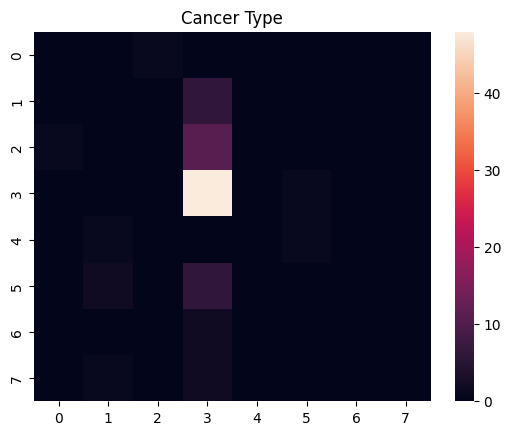

In [226]:
from sklearn.metrics import confusion_matrix

sns.heatmap(conf_mx)
plt.title('Cancer Type')
plt.savefig('multi_conf.png')

In [227]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [228]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [229]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(9, activation="softmax")
])

In [230]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 9)                 684       
                                                                 
Total params: 15,759
Trainable params: 15,759
Non-trainable params: 0
_________________________________________________________________


In [231]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [232]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
6/6 [==============================] - 0s 20ms/step - loss: 2.2852 - accuracy: 0.0365 - val_loss: 2.2783 - val_accuracy: 0.0482
Epoch 2/5
6/6 [==============================] - 0s 5ms/step - loss: 2.2736 - accuracy: 0.0365 - val_loss: 2.2676 - val_accuracy: 0.0482
Epoch 3/5
6/6 [==============================] - 0s 5ms/step - loss: 2.2618 - accuracy: 0.0365 - val_loss: 2.2567 - val_accuracy: 0.0602
Epoch 4/5
6/6 [==============================] - 0s 5ms/step - loss: 2.2499 - accuracy: 0.0365 - val_loss: 2.2457 - val_accuracy: 0.0602
Epoch 5/5
6/6 [==============================] - 0s 5ms/step - loss: 2.2377 - accuracy: 0.0417 - val_loss: 2.2345 - val_accuracy: 0.0602


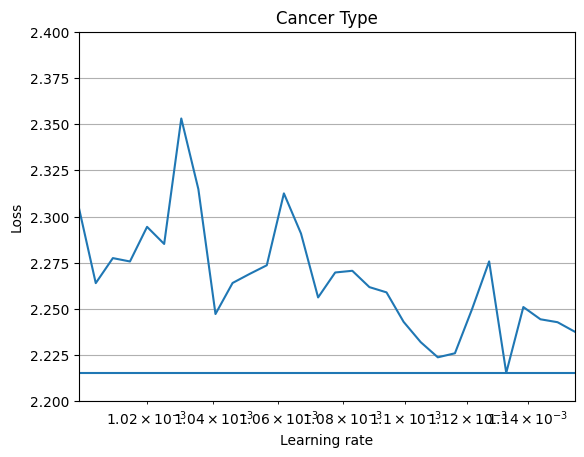

In [240]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 2.2, 2.4])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title('Cancer Type')
plt.savefig('multiclass_loss.png')

In [242]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 2.2154273986816406
Best learning rate: 0.0011327956


In [243]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [244]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(9, activation="softmax")
])

In [245]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [246]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "kidneytypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\kidneytypes_logs\\run_001'

In [247]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("kidneytypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
6/6 [==============================] - 0s 27ms/step - loss: 2.2537 - accuracy: 0.1250 - val_loss: 2.2610 - val_accuracy: 0.0843
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 2.2397 - accuracy: 0.1302 - val_loss: 2.2484 - val_accuracy: 0.0964
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 2.2257 - accuracy: 0.1354 - val_loss: 2.2360 - val_accuracy: 0.1084
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 2.2120 - accuracy: 0.1667 - val_loss: 2.2238 - val_accuracy: 0.1205
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 2.1985 - accuracy: 0.1771 - val_loss: 2.2118 - val_accuracy: 0.1446
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 2.1852 - accuracy: 0.1771 - val_loss: 2.1999 - val_accuracy: 0.1687
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 2.1721 - accuracy: 0.1823 - val_loss: 2.1883 - val_accuracy: 0.2048
Epoch 8/200
6/6 [=========

In [211]:
model = keras.models.load_model("kidneytypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

6/6 [==============================] - 0s 4ms/step - loss: 1.3920 - accuracy: 0.6042


[1.392008662223816, 0.6041666865348816]

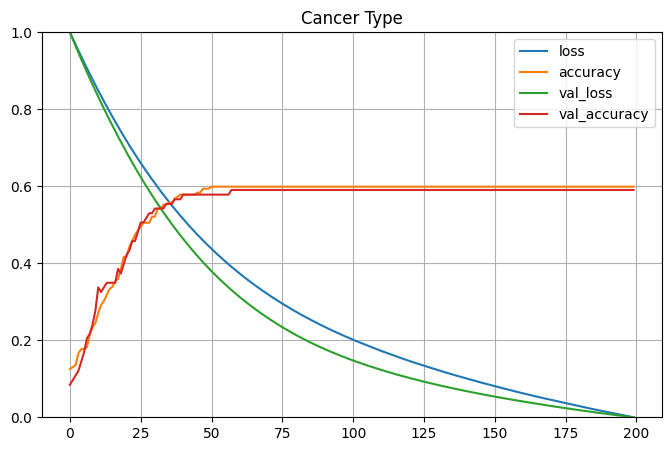

In [249]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Cancer Type')
plt.savefig('Multiclass_training.png')
plt.show()